In [1]:
import numpy as np
import scipy as sp
import scipy.fftpack
from scipy.signal import argrelextrema
from scipy.signal import find_peaks
from matplotlib import pyplot as plt
from functools import partial
from scipy.signal import butter, filtfilt, freqz, lfilter
from scipy.signal import kaiserord, lfilter, firwin, freqz
from pylab import *
import scipy.signal as signal
import scipy.special as spy
π = np.pi; pi = np.pi
from scipy.signal import savgol_filter
import copy
import qutip
from mpl_toolkits.mplot3d import Axes3D

import os
import sys

In [2]:
%matplotlib notebook

<IPython.core.display.Javascript object>


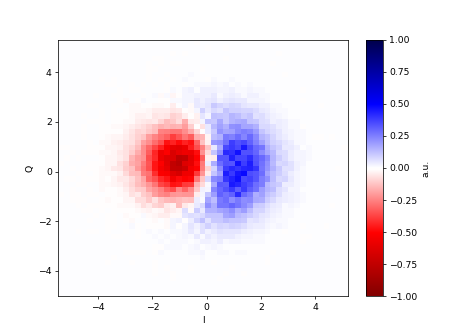

<IPython.core.display.Javascript object>


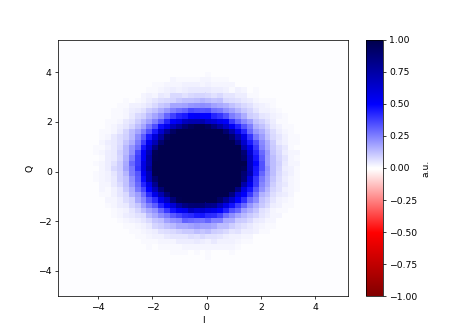

<IPython.core.display.Javascript object>


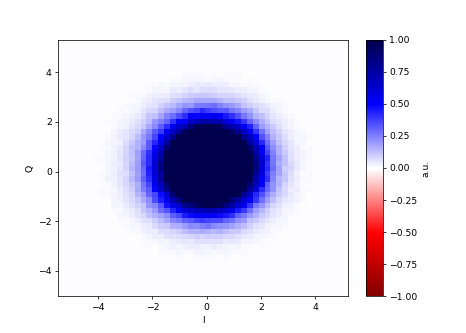

In [9]:
path = '/Users/andreas/Desktop/work/cluster_state/photon_tomography/measurement_data'
f_real = open(os.path.join(path, 'Q3_278.22mV_field_singleshot_1.5pi_5times_real.txt'))
f_imag = open(os.path.join(path, 'Q3_278.22mV_field_singleshot_1.5pi_5times_imag.txt'))
data_real = f_real.readlines()
data_imag = f_imag.readlines()
data_real_all = np.array( [np.array([float(val) for val in data_real[i].split('\t')]) for i in range(4,9)]).flatten()
data_imag_all = np.array( [np.array([float(val) for val in data_imag[i].split('\t')]) for i in range(4,9)]).flatten()
shots_all_p1 = (data_real_all + 1j*data_imag_all)
f_real.close(); f_imag.close()

f_real = open(os.path.join(path, 'Q3_278.22mV_field_singleshot_1.5pi_5times_real_dark.txt'))
f_imag = open(os.path.join(path, 'Q3_278.22mV_field_singleshot_1.5pi_5times_imag_dark.txt'))
data_real = f_real.readlines()
data_imag = f_imag.readlines()
data_real_all = np.array( [np.array([float(val) for val in data_real[i].split('\t')]) for i in range(4,9)]).flatten()
data_imag_all = np.array( [np.array([float(val) for val in data_imag[i].split('\t')]) for i in range(4,9)]).flatten()
shots_all_dark = (data_real_all + 1j*data_imag_all)
f_real.close(); f_imag.close()

hist_2D_p1 = np.histogram2d(np.real(shots_all_p1), np.imag(shots_all_p1), bins = 50, density = True)
hist_2D_dark = np.histogram2d(np.real(shots_all_dark), np.imag(shots_all_dark), 
                                 range = [[hist_2D_p1[1][0], hist_2D_p1[1][-1]], [hist_2D_p1[2][0], hist_2D_p1[2][-1]]],
                                 bins = 50, density = True)
dI_dQ = (hist_2D_p1[1][0] - hist_2D_p1[1][-1])*(hist_2D_p1[2][0] - hist_2D_p1[2][-1])/2500

fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(1,1,1)
yy, xx = np.meshgrid(hist_2D_p1[1][:-1], hist_2D_p1[2][:-1])
pcolor = ax.pcolormesh(xx, yy, (hist_2D_p1[0] - hist_2D_dark[0])/dI_dQ, cmap='seismic_r')
fig.colorbar(pcolor, ax=ax, aspect = 15, label = "a.u.")
ax.set_xlabel('I'); ax.set_ylabel('Q') 
pcolor.set_clim(-1,1)

fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(1,1,1)
yy, xx = np.meshgrid(hist_2D_p1[1][:-1], hist_2D_p1[2][:-1])
pcolor = ax.pcolormesh(xx, yy, (hist_2D_dark[0])/dI_dQ, cmap='seismic_r')
fig.colorbar(pcolor, ax=ax, aspect = 15, label = "a.u.")
ax.set_xlabel('I'); ax.set_ylabel('Q') 
pcolor.set_clim(-1,1)

fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(1,1,1)
yy, xx = np.meshgrid(hist_2D_p1[1][:-1], hist_2D_p1[2][:-1])
pcolor = ax.pcolormesh(xx, yy, (hist_2D_p1[0])/dI_dQ, cmap='seismic_r')
fig.colorbar(pcolor, ax=ax, aspect = 15, label = "a.u.")
ax.set_xlabel('I'); ax.set_ylabel('Q') 
pcolor.set_clim(-1,1)

# #psi = Qobj(np.array([[0, 0], [0,1]]))
# psi = (qutip.basis(2,0) + qutip.basis(2,1)).unit()
# wigner_sim = qutip.wigner(psi, hist_2D_p1[1][:-1], hist_2D_p1[2][:-1], g = 1/np.sqrt(2))
# fig = plt.figure(figsize=(7,5))
# ax = fig.add_subplot(1,1,1)
# pcolor = ax.pcolormesh(yy, xx, wigner_sim/.15, cmap='seismic_r')
# fig.colorbar(pcolor, ax=ax, aspect = 15, label = "a.u.")
# ax.set_xlabel('I'); ax.set_ylabel('Q') 
# pcolor.set_clim(-1,1)

# a = np.mean(shots_all_p1); hdag_h = np.mean(np.abs(shots_all_dark)**2); 
# hdag_2_h_2 = np.mean(np.abs(shots_all_dark)**4) 
# adag_a = np.mean(np.abs(shots_all_p1)**2) - hdag_h
# a_2 = np.mean(shots_all_p1**2); 
# adag_2_a = np.mean(np.conj(shots_all_p1)*np.abs(shots_all_p1)**2) - 2 * np.conj(a) * hdag_h
# adag_2_a_2 = np.mean(np.abs(shots_all_p1)**4) - 4*adag_a*hdag_h - hdag_2_h_2

# loss_scaling = 0.6665061576492075

# rho = qutip.Qobj(np.array([[1 - adag_a, a], [np.conj(a), adag_a]]))
# rho = (rho - (1- loss_scaling) * np.array([[1,0],[0,0]]))/loss_scaling


# fig = plt.figure( figsize=(8,5) )
# ax = Axes3D(fig, azim=-35, elev=35)
# qutip.matrix_histogram_complex(rho, fig=fig, ax=ax) 
# rho

# rho_from_moments = np.zeros((3,3), dtype = complex)

# rho_from_moments[0,0] = 1 - adag_a +  adag_2_a_2/2
# rho_from_moments[0,1] = a - np.conj(adag_2_a)
# rho_from_moments[0,2] = a_2/sqrt(2)

# rho_from_moments[1,0] = np.conj(rho_from_moments[0,1])
# rho_from_moments[1,1] = adag_a - adag_2_a_2
# rho_from_moments[1,2] = np.conj(adag_2_a)/sqrt(2)


# rho_from_moments[2,0] = np.conj(rho_from_moments[0,2])
# rho_from_moments[2,1] = np.conj(rho_from_moments[1,2])
# rho_from_moments[2,2] = adag_2_a_2/2

# rho_from_moments = (rho_from_moments - (1- loss_scaling) * np.array([[1,0,0],[0,0,0],[0,0,0]]))/loss_scaling
# fig = plt.figure( figsize=(8,5) )
# ax = Axes3D(fig, azim=-35, elev=35)
# qutip.matrix_histogram_complex(qutip.Qobj(rho_from_moments), fig=fig, ax=ax) 
# qutip.Qobj(rho_from_moments)

<IPython.core.display.Javascript object>


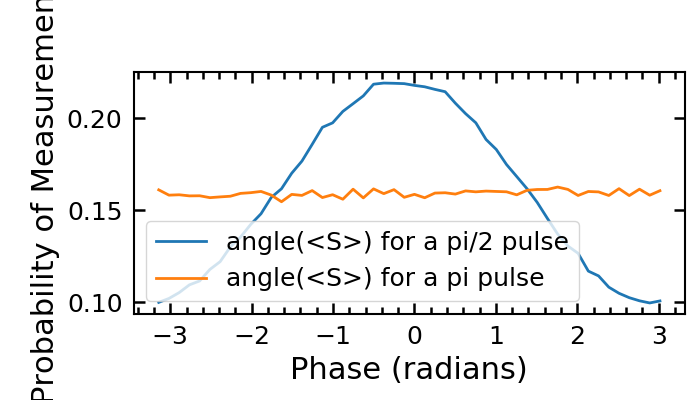

In [88]:
phase_hist_half_pi = np.histogram(np.angle(shots_all_p1), bins = 50, density = True)
phase_hist_dark = np.histogram(np.angle(shots_all_dark), bins = 50, density = True)
plt.figure()
plt.plot(phase_hist_half_pi[1][:-1], phase_hist_half_pi[0], label = "angle(<S>) for a pi/2 pulse")
plt.plot(phase_hist_half_pi[1][:-1], phase_hist_dark[0], label = "angle(<S>) for dark meas")
plt.xlabel("Phase (radians)"), plt.ylabel("Probability of Measurement")
plt.legend()

<IPython.core.display.Javascript object>


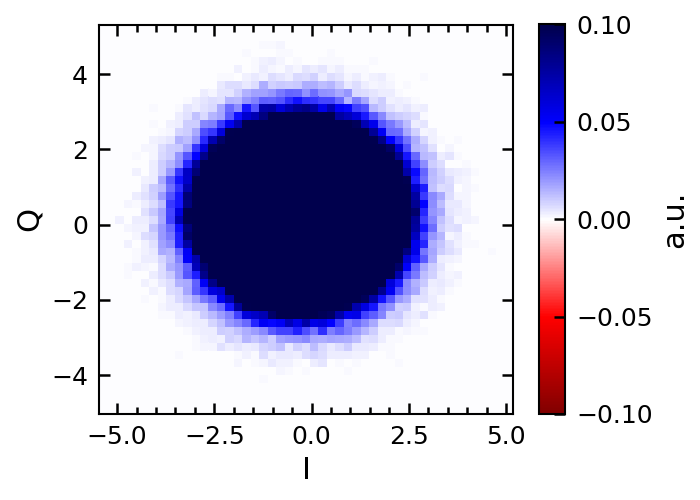

In [28]:
fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(1,1,1)
yy, xx = np.meshgrid(hist_2D_p1[1][:-1], hist_2D_p1[2][:-1])
pcolor = ax.pcolormesh(xx, yy, (hist_2D_dark[0])/dI_dQ, cmap='seismic_r')
fig.colorbar(pcolor, ax=ax, aspect = 15, label = "a.u.")
ax.set_xlabel('I'); ax.set_ylabel('Q') 
pcolor.set_clim(-0.1,0.1)

In [13]:
np.abs(hdag_h)

2.314967209412734

<IPython.core.display.Javascript object>


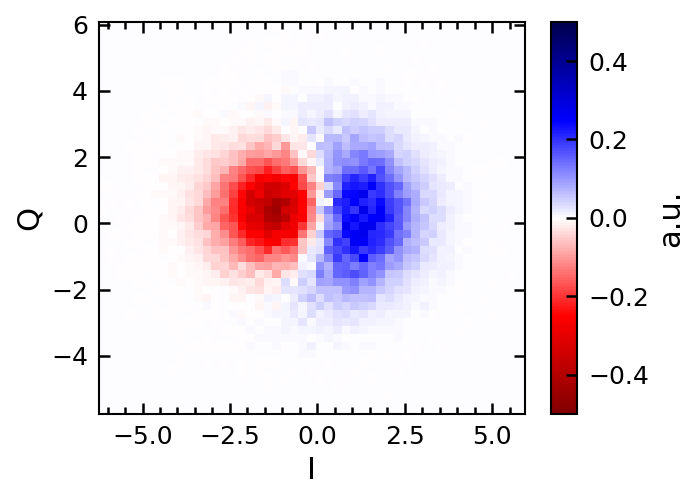

<IPython.core.display.Javascript object>


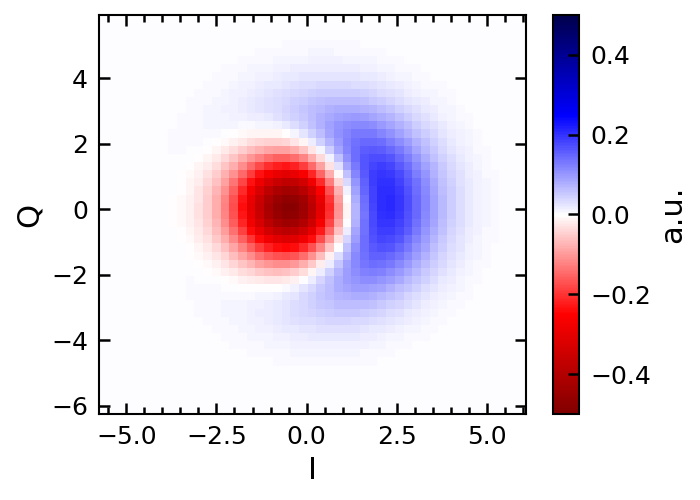

<IPython.core.display.Javascript object>


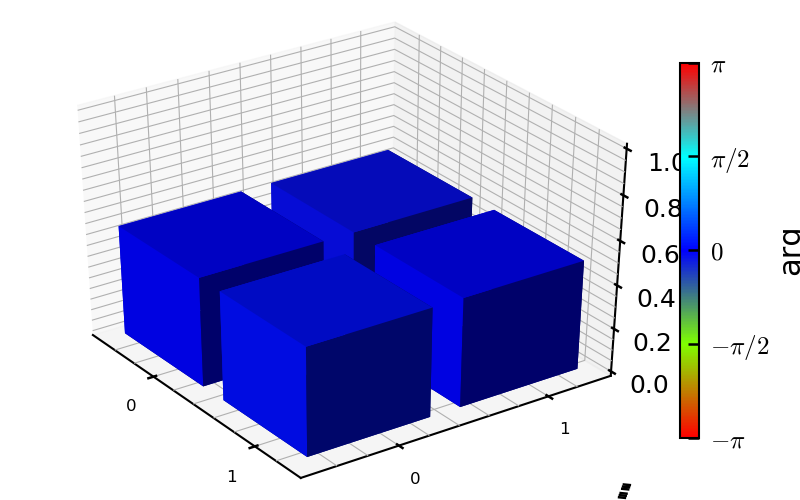

<IPython.core.display.Javascript object>


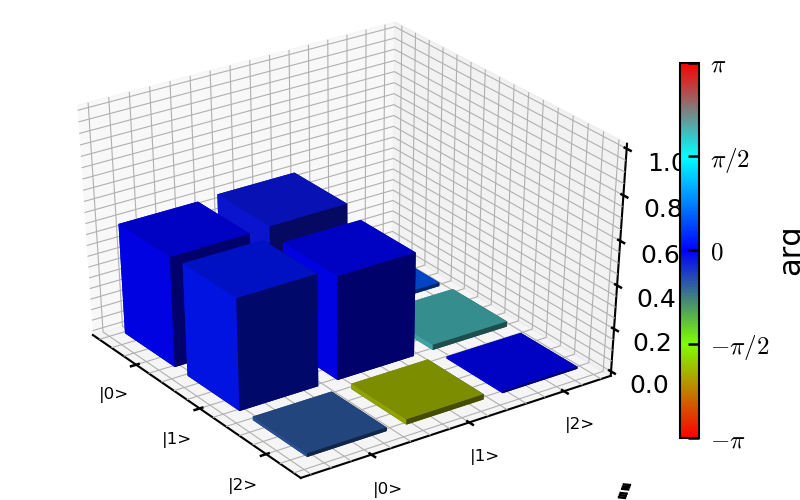

Quantum object: dims = [[3], [3]], shape = (3, 3), type = oper, isherm = True
Qobj data =
[[ 0.50972571+0.j          0.51227223-0.07480278j  0.01427233+0.00889552j]
 [ 0.51227223+0.07480278j  0.48054857+0.j         -0.01000052+0.02233921j]
 [ 0.01427233-0.00889552j -0.01000052-0.02233921j  0.00972571+0.j        ]]

In [14]:
f_real = open("C:/Users/szilard\Desktop\measurement data\Q3_278.22mV_field_singleshot_1.5pi_5times_real.txt")
f_imag = open("C:/Users/szilard\Desktop\measurement data\Q3_278.22mV_field_singleshot_1.5pi_5times_imag.txt")
data_real = f_real.readlines()
data_imag = f_imag.readlines()
data_real_all = np.array( [np.array([float(val) for val in data_real[i].split('\t')]) for i in range(4,9)]).flatten()
data_imag_all = np.array( [np.array([float(val) for val in data_imag[i].split('\t')]) for i in range(4,9)]).flatten()
shots_all_p1 = (data_real_all + 1j*data_imag_all)/0.8750021797549064
f_real.close(); f_imag.close()

f_real = open("C:/Users/szilard\Desktop\measurement data\Q3_278.22mV_field_singleshot_1.5pi_5times_real_dark.txt")
f_imag = open("C:/Users/szilard\Desktop\measurement data\Q3_278.22mV_field_singleshot_1.5pi_5times_imag_dark.txt")
data_real = f_real.readlines()
data_imag = f_imag.readlines()
data_real_all = np.array( [np.array([float(val) for val in data_real[i].split('\t')]) for i in range(4,9)]).flatten()
data_imag_all = np.array( [np.array([float(val) for val in data_imag[i].split('\t')]) for i in range(4,9)]).flatten()
shots_all_dark = (data_real_all + 1j*data_imag_all)*1.01/0.8750021797549064
f_real.close(); f_imag.close()

hist_2D_p1 = np.histogram2d(np.real(shots_all_p1), np.imag(shots_all_p1), bins = 50, density = True)
hist_2D_dark = np.histogram2d(np.real(shots_all_dark), np.imag(shots_all_dark), 
                                 range = [[hist_2D_p1[1][0], hist_2D_p1[1][-1]], [hist_2D_p1[2][0], hist_2D_p1[2][-1]]],
                                 bins = 50, density = True)
dI_dQ = (hist_2D_p1[1][0] - hist_2D_p1[1][-1])*(hist_2D_p1[2][0] - hist_2D_p1[2][-1])/2500

fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(1,1,1)
yy, xx = np.meshgrid(hist_2D_p1[1][:-1], hist_2D_p1[2][:-1])
pcolor = ax.pcolormesh(xx, yy, (hist_2D_p1[0] - hist_2D_dark[0])/dI_dQ, cmap='seismic_r')
fig.colorbar(pcolor, ax=ax, aspect = 15, label = "a.u.")
ax.set_xlabel('I'); ax.set_ylabel('Q') 
pcolor.set_clim(-0.5,0.5)

a = np.mean(shots_all_p1); hdag_h = np.mean(np.abs(shots_all_dark)**2); 
hdag_2_h_2 = np.mean(np.abs(shots_all_dark)**4) 
adag_a = np.mean(np.abs(shots_all_p1)**2) - hdag_h
a_2 = np.mean(shots_all_p1**2); 
adag_2_a = np.mean(np.conj(shots_all_p1)*np.abs(shots_all_p1)**2) - 2 * np.conj(a) * hdag_h
adag_2_a_2 = np.mean(np.abs(shots_all_p1)**4) - 4*adag_a*hdag_h - hdag_2_h_2

#loss_scaling = 0.6665061576492075
loss_scaling = 0.7489849714557897

rho = qutip.Qobj(np.array([[1 - adag_a, a], [np.conj(a), adag_a]]))
rho_corrected = (rho - (1- loss_scaling) * np.array([[1,0],[0,0]]))/loss_scaling


#psi = Qobj(np.array([[0, 0], [0,1]]))
#psi = (qutip.basis(2,0) + qutip.basis(2,1)).unit()
wigner_sim1 = qutip.wigner(rho, hist_2D_p1[1][:-1], hist_2D_p1[2][:-1], g= 1/sqrt(2))
wigner_sim2 = qutip.wigner(qutip.basis(2,0), hist_2D_p1[1][:-1], hist_2D_p1[2][:-1], g=1/sqrt(2))
fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(1,1,1)
pcolor = ax.pcolormesh(yy, xx, (wigner_sim1-wigner_sim2)/.15, cmap='seismic_r')
fig.colorbar(pcolor, ax=ax, aspect = 15, label = "a.u.")
ax.set_xlabel('I'); ax.set_ylabel('Q') 
pcolor.set_clim(-0.5,0.5)


fig = plt.figure( figsize=(8,5) )
ax = Axes3D(fig, azim=-35, elev=35)
qutip.matrix_histogram_complex(rho_corrected, fig=fig, ax=ax) 
rho_corrected

rho_from_moments = np.zeros((3,3), dtype = complex)

rho_from_moments[0,0] = 1 - adag_a +  adag_2_a_2/2
rho_from_moments[0,1] = a - np.conj(adag_2_a)
rho_from_moments[0,2] = a_2/sqrt(2)

rho_from_moments[1,0] = np.conj(rho_from_moments[0,1])
rho_from_moments[1,1] = adag_a - adag_2_a_2
rho_from_moments[1,2] = np.conj(adag_2_a)/sqrt(2)


rho_from_moments[2,0] = np.conj(rho_from_moments[0,2])
rho_from_moments[2,1] = np.conj(rho_from_moments[1,2])
rho_from_moments[2,2] = adag_2_a_2/2

rho_from_moments = (rho_from_moments - (1- loss_scaling) * np.array([[1,0,0],[0,0,0],[0,0,0]]))/loss_scaling
fig = plt.figure( figsize=(8,5) )
ax = Axes3D(fig, azim=-35, elev=35)
qutip.matrix_histogram_complex(qutip.Qobj(rho_from_moments), fig=fig, ax=ax, ylabels=['','|0>', '|1>', '|2>'], xlabels=['','|0>', '|1>', '|2>']) 
qutip.Qobj(rho_from_moments)

In [75]:
adag_a/np.abs(a)

0.8750021797549064

In [17]:
np.abs(hdag_h)

3.084390249379804

In [116]:
rho

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0.62550751+0.j         0.37309141-0.03236391j]
 [0.37309141+0.03236391j 0.37449249+0.j        ]]

<IPython.core.display.Javascript object>


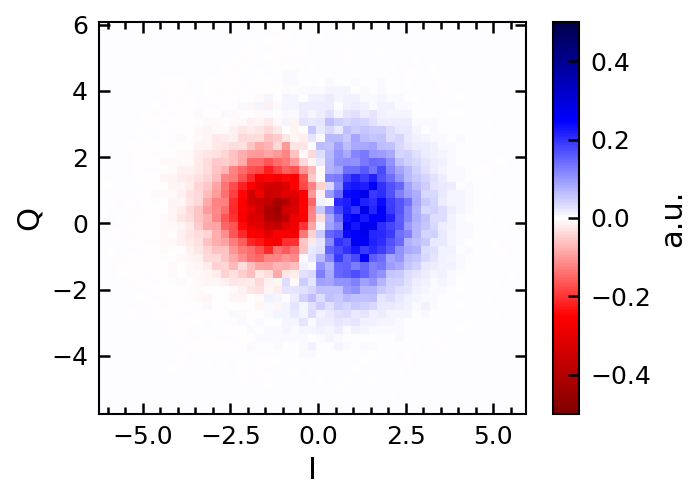

In [174]:
fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(1,1,1)
yy, xx = np.meshgrid(hist_2D_p1[1][:-1], hist_2D_p1[2][:-1])
pcolor = ax.pcolormesh(xx, yy, (hist_2D_p1[0] - hist_2D_dark[0])/dI_dQ, cmap='seismic_r')
fig.colorbar(pcolor, ax=ax, aspect = 15, label = "a.u.")
ax.set_xlabel('I'); ax.set_ylabel('Q') 
pcolor.set_clim(-0.5,0.5)

<IPython.core.display.Javascript object>


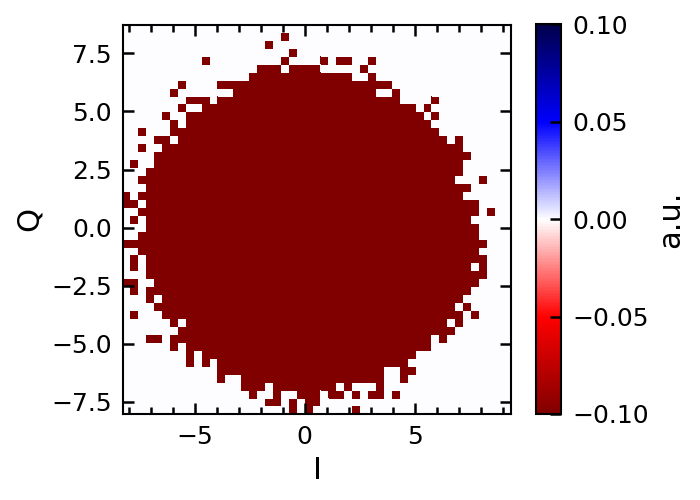

<IPython.core.display.Javascript object>


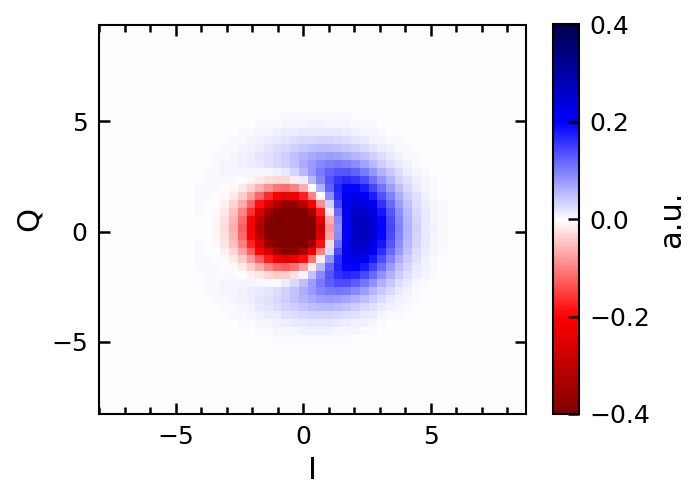

<IPython.core.display.Javascript object>


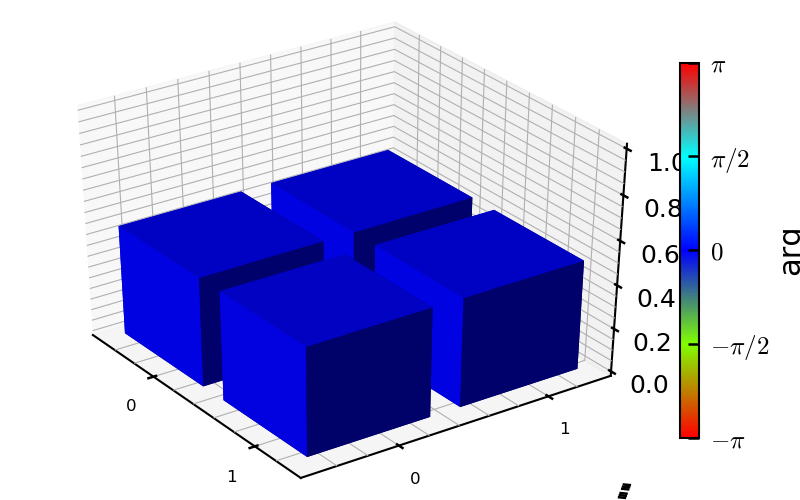

<IPython.core.display.Javascript object>


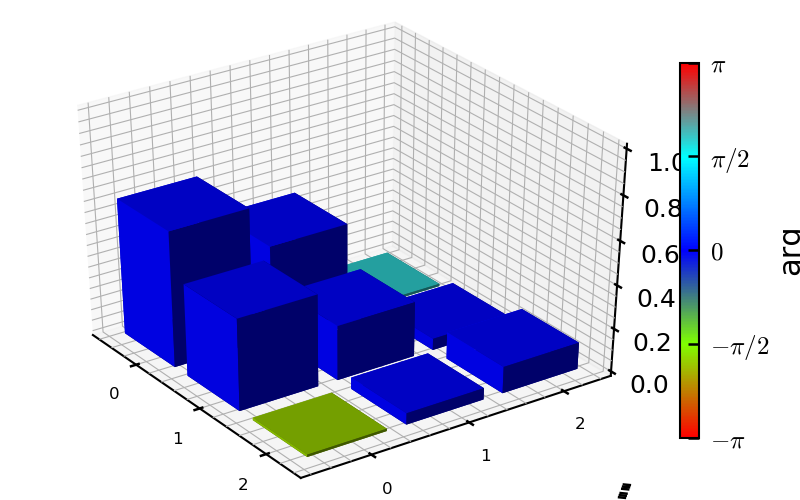

Quantum object: dims = [[3], [3]], shape = (3, 3), type = oper, isherm = True
Qobj data =
[[ 0.62349419+0.j          0.42480954+0.00154059j -0.00305685+0.01071623j]
 [ 0.42480954-0.00154059j  0.25301161+0.j          0.05316762-0.00088123j]
 [-0.00305685-0.01071623j  0.05316762+0.00088123j  0.12349419+0.j        ]]

In [4]:
gain_scaling = 4.0931546058599855
global_phase = np.exp(-1j*pi/25)
f_real = open("C:/Users/szilard\Desktop\measurement data\Q3_295mV_field_avg_one_photons_calibrated_single_shot_unscaled_pi_half_real.txt")
f_imag = open("C:/Users/szilard\Desktop\measurement data\Q3_295mV_field_avg_one_photons_calibrated_single_shot_unscaled_pi_half_imag.txt")
data_real = f_real.readlines()
data_imag = f_imag.readlines()
data_real_all = np.array( [np.array([float(val) for val in data_real[i].split('\t')]) for i in range(4,19)]).flatten()
data_imag_all = np.array( [np.array([float(val) for val in data_imag[i].split('\t')]) for i in range(4,19)]).flatten()
shots_all_p1 = global_phase * (data_real_all + 1j*data_imag_all)/gain_scaling
f_real.close(); f_imag.close()

f_real = open("C:/Users/szilard\Desktop\measurement data\Q3_295mV_field_avg_one_photons_calibrated_single_shot_unscaled_dark_real.txt")
f_imag = open("C:/Users/szilard\Desktop\measurement data\Q3_295mV_field_avg_one_photons_calibrated_single_shot_unscaled_dark_imag.txt")
data_real = f_real.readlines()
data_imag = f_imag.readlines()
data_real_all = np.array( [np.array([float(val) for val in data_real[i].split('\t')]) for i in range(4,19)]).flatten()
data_imag_all = np.array( [np.array([float(val) for val in data_imag[i].split('\t')]) for i in range(4,19)]).flatten()
shots_all_dark = global_phase * (data_real_all + 1j*data_imag_all)/gain_scaling
f_real.close(); f_imag.close()

hist_2D_p1 = np.histogram2d(np.real(shots_all_p1), np.imag(shots_all_p1), bins = 50, density = True)
hist_2D_dark = np.histogram2d(np.real(shots_all_dark), np.imag(shots_all_dark), 
                                 range = [[hist_2D_p1[1][0], hist_2D_p1[1][-1]], [hist_2D_p1[2][0], hist_2D_p1[2][-1]]],
                                 bins = 50, density = False)
dI_dQ = (hist_2D_p1[1][0] - hist_2D_p1[1][-1])*(hist_2D_p1[2][0] - hist_2D_p1[2][-1])/2500

fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(1,1,1)
yy, xx = np.meshgrid(hist_2D_p1[1][:-1], hist_2D_p1[2][:-1])
pcolor = ax.pcolormesh(xx, yy, (hist_2D_p1[0] - hist_2D_dark[0])/dI_dQ, cmap='seismic_r')
fig.colorbar(pcolor, ax=ax, aspect = 15, label = "a.u.")
ax.set_xlabel('I'); ax.set_ylabel('Q') 
pcolor.set_clim(-0.1,0.1)

a = np.mean(shots_all_p1); hdag_h = np.mean(np.abs(shots_all_dark)**2); 
hdag_2_h_2 = np.mean(np.abs(shots_all_dark)**4) 
adag_a = np.mean(np.abs(shots_all_p1)**2) - hdag_h
a_2 = np.mean(shots_all_p1**2); 
adag_2_a = np.mean(np.conj(shots_all_p1)*np.abs(shots_all_p1)**2) - 2 * np.conj(a) * hdag_h
adag_2_a_2 = np.mean(np.abs(shots_all_p1)**4) - hdag_2_h_2 - 4*adag_a*hdag_h 

loss_scaling = adag_a/0.5
#loss_scaling = 0.6665061576492075

rho = qutip.Qobj(np.array([[1 - adag_a, a], [np.conj(a), adag_a]]))
rho = (rho - (1- loss_scaling) * np.array([[1,0],[0,0]]))/loss_scaling

#psi = Qobj(np.array([[0, 0], [0,1]]))
#psi = (qutip.basis(2,0) + qutip.basis(2,1)).unit()
wigner_sim1 = qutip.wigner(rho, hist_2D_p1[1][:-1], hist_2D_p1[2][:-1], g= 1/sqrt(2))
wigner_sim2 = qutip.wigner(qutip.basis(2,0), hist_2D_p1[1][:-1], hist_2D_p1[2][:-1], g=1/sqrt(2))
fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(1,1,1)
pcolor = ax.pcolormesh(yy, xx, (wigner_sim1-wigner_sim2)/.15, cmap='seismic_r')
fig.colorbar(pcolor, ax=ax, aspect = 15, label = "a.u.")
ax.set_xlabel('I'); ax.set_ylabel('Q') 
pcolor.set_clim(-0.4,0.4)

fig = plt.figure( figsize=(8,5) )
ax = Axes3D(fig, azim=-35, elev=35)
qutip.matrix_histogram_complex(rho, fig=fig, ax=ax) 
rho

rho_from_moments = np.zeros((3,3), dtype = complex)

rho_from_moments[0,0] = 1 - adag_a +  adag_2_a_2/2
rho_from_moments[0,1] = a - np.conj(adag_2_a)
rho_from_moments[0,2] = a_2/sqrt(2)

rho_from_moments[1,0] = np.conj(rho_from_moments[0,1])
rho_from_moments[1,1] = adag_a - adag_2_a_2
rho_from_moments[1,2] = np.conj(adag_2_a)/sqrt(2)


rho_from_moments[2,0] = np.conj(rho_from_moments[0,2])
rho_from_moments[2,1] = np.conj(rho_from_moments[1,2])
rho_from_moments[2,2] = adag_2_a_2/2

rho_from_moments = (rho_from_moments - (1- loss_scaling) * np.array([[1,0,0],[0,0,0],[0,0,0]]))/loss_scaling
fig = plt.figure( figsize=(8,5) )
ax = Axes3D(fig, azim=-35, elev=35)
qutip.matrix_histogram_complex(qutip.Qobj(rho_from_moments), fig=fig, ax=ax) 
qutip.Qobj(rho_from_moments)

In [296]:
alphas[23, 22]



(0.019203179724621044-0.15823603187367752j)

In [10]:
gain_scaling = adag_a/np.abs(a)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


<IPython.core.display.Javascript object>


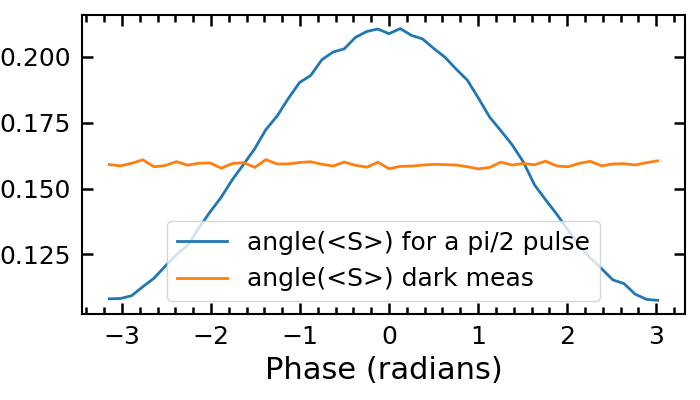

In [184]:
phase_hist_half_pi = np.histogram(np.angle(shots_all_p1), bins = 50, density = True)
phase_hist_dark = np.histogram(np.angle(shots_all_dark), bins = 50, density = True)
plt.figure()
plt.plot(phase_hist_half_pi[1][:-1], phase_hist_half_pi[0], label = "angle(<S>) for a pi/2 pulse")
plt.plot(phase_hist_half_pi[1][:-1], phase_hist_dark[0], label = "angle(<S>) dark meas")
plt.xlabel("Phase (radians)"), #plt.ylabel("Probability of Measurement")
plt.legend()

In [36]:
hdag_2_h_2

59.0889263680516

In [37]:
adag_a

0.42465902395266486

In [41]:
np.mean(np.abs(shots_all_p1)**4) - 4*adag_a*hdag_h - hdag_2_h_2

0.20977169683342822

In [40]:
adag_a*hdag_h

2.29191127891744

In [38]:
np.mean(shots_all_p1**2)

(-0.003671639029361363+0.01287144615209206j)

<IPython.core.display.Javascript object>


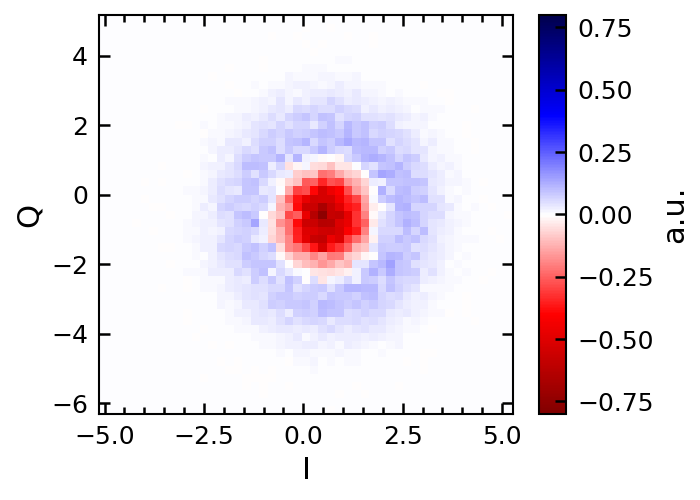

<IPython.core.display.Javascript object>


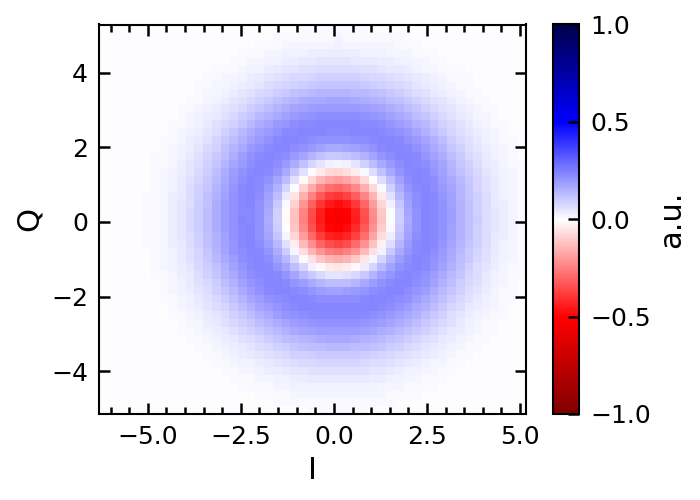

<IPython.core.display.Javascript object>


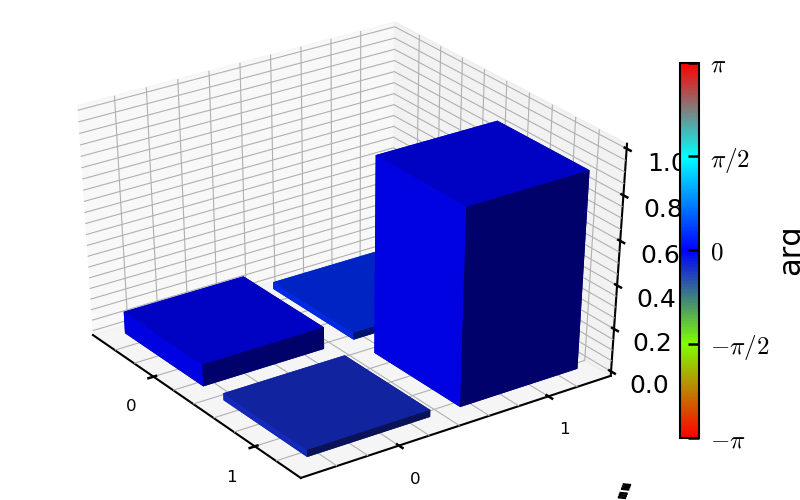

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0.10259662+0.j        0.03143182+0.0089753j]
 [0.03143182-0.0089753j 0.89740338+0.j       ]]

In [20]:
f_real = open("C:/Users/szilard\Desktop\measurement data\Q3_278.22mV_field_singleshot_pi_5times_real.txt")
f_imag = open("C:/Users/szilard\Desktop\measurement data\Q3_278.22mV_field_singleshot_pi_5times_imag.txt")
data_real = f_real.readlines()
data_imag = f_imag.readlines()
data_real_all = np.array( [np.array([float(val) for val in data_real[i].split('\t')]) for i in range(4,9)]).flatten()
data_imag_all = np.array( [np.array([float(val) for val in data_imag[i].split('\t')]) for i in range(4,9)]).flatten()
shots_all_p1 = data_real_all + 1j*data_imag_all
f_real.close(); f_imag.close()

f_real = open("C:/Users/szilard\Desktop\measurement data\Q3_278.22mV_field_singleshot_pi_5times_real_dark.txt")
f_imag = open("C:/Users/szilard\Desktop\measurement data\Q3_278.22mV_field_singleshot_pi_5times_imag_dark.txt")
data_real = f_real.readlines()
data_imag = f_imag.readlines()
data_real_all = np.array( [np.array([float(val) for val in data_real[i].split('\t')]) for i in range(4,9)]).flatten()
data_imag_all = np.array( [np.array([float(val) for val in data_imag[i].split('\t')]) for i in range(4,9)]).flatten()
shots_all_dark = data_real_all + 1j*data_imag_all
f_real.close(); f_imag.close()

hist_2D_p1 = np.histogram2d(np.real(shots_all_p1), np.imag(shots_all_p1), bins = 50, density = True)
hist_2D_dark = np.histogram2d(np.real(shots_all_dark), np.imag(shots_all_dark), 
                                 range = [[hist_2D_p1[1][0], hist_2D_p1[1][-1]], [hist_2D_p1[2][0], hist_2D_p1[2][-1]]],
                                 bins = 50, density = True)
dI_dQ = (hist_2D_p1[1][0] - hist_2D_p1[1][-1])*(hist_2D_p1[2][0] - hist_2D_p1[2][-1])/2500

fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(1,1,1)
yy, xx = np.meshgrid(hist_2D_p1[1][:-1], hist_2D_p1[2][:-1])
pcolor = ax.pcolormesh(xx, yy, (hist_2D_p1[0] - hist_2D_dark[0])/dI_dQ, cmap='seismic_r')
fig.colorbar(pcolor, ax=ax, aspect = 15, label = "a.u.")
ax.set_xlabel('I'); ax.set_ylabel('Q') 
pcolor.set_clim(-0.8,0.8)

#psi = Qobj(np.array([[0, 0], [0,1]]))
psi = (qutip.basis(2,1)).unit()
wigner_sim = qutip.wigner(psi, hist_2D_p1[1][:-1], hist_2D_p1[2][:-1], g = 1/np.sqrt(2))
fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(1,1,1)
pcolor = ax.pcolormesh(yy, xx, wigner_sim/.15, cmap='seismic_r')
fig.colorbar(pcolor, ax=ax, aspect = 15, label = "a.u.")
ax.set_xlabel('I'); ax.set_ylabel('Q') 
pcolor.set_clim(-1,1)

a = np.mean(shots_all_p1); hdag_h = np.mean(np.abs(shots_all_dark)**2); 
hdag_2_h_2 = np.mean(np.abs(shots_all_dark)**4) 
adag_a = np.mean(np.abs(shots_all_p1)**2) - hdag_h
a_2 = np.mean(shots_all_p1**2); 
adag_2_a = np.mean(np.conj(shots_all_p1)*np.abs(shots_all_p1)**2) - 2 * np.conj(a) * hdag_h
adag_2_a_2 = np.mean(np.abs(shots_all_p1)**4) - 4*adag_a*hdag_h - hdag_2_h_2

rho = qutip.Qobj(np.array([[1 - adag_a, a], [np.conj(a), adag_a]]))
rho = (rho - (1- loss_scaling) * np.array([[1,0],[0,0]]))/loss_scaling


fig = plt.figure( figsize=(8,5) )
ax = Axes3D(fig, azim=-35, elev=35)
qutip.matrix_histogram_complex(rho, fig=fig, ax=ax) 
rho

<IPython.core.display.Javascript object>


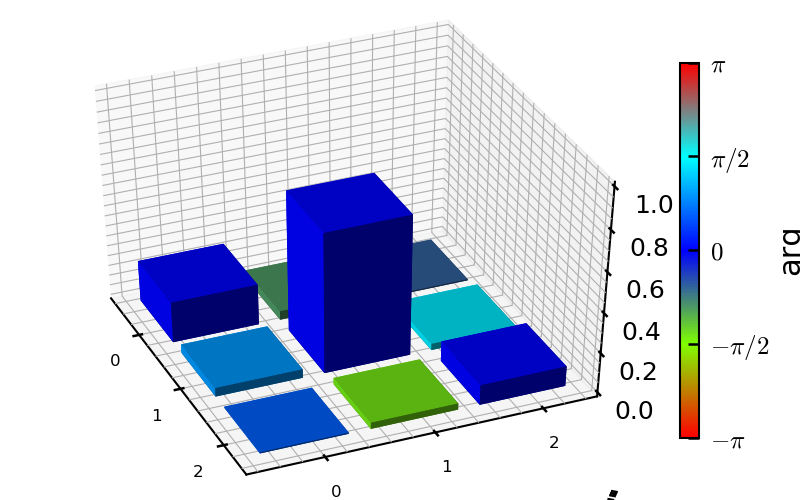

Quantum object: dims = [[3], [3]], shape = (3, 3), type = oper, isherm = True
Qobj data =
[[0.20288519+0.j         0.02538953-0.03554684j 0.00460589-0.00323347j]
 [0.02538953+0.03554684j 0.69682625+0.j         0.00427255+0.03148191j]
 [0.00460589+0.00323347j 0.00427255-0.03148191j 0.10028857+0.j        ]]

In [177]:
rho_from_moments = np.zeros((3,3), dtype = complex)

rho_from_moments[0,0] = 1 - adag_a +  adag_2_a_2/2
rho_from_moments[0,1] = a - np.conj(adag_2_a)
rho_from_moments[0,2] = a_2/sqrt(2)

rho_from_moments[1,0] = np.conj(rho_from_moments[0,1])
rho_from_moments[1,1] = adag_a - adag_2_a_2
rho_from_moments[1,2] = np.conj(adag_2_a)/sqrt(2)


rho_from_moments[2,0] = np.conj(rho_from_moments[0,2])
rho_from_moments[2,1] = np.conj(rho_from_moments[1,2])
rho_from_moments[2,2] = adag_2_a_2/2

rho_from_moments = (rho_from_moments - (1- loss_scaling) * np.array([[1,0,0],[0,0,0],[0,0,0]]))/loss_scaling
fig = plt.figure( figsize=(8,5) )
ax = Axes3D(fig, azim=-35, elev=35)
qutip.matrix_histogram_complex(qutip.Qobj(rho_from_moments), fig=fig, ax=ax) 
qutip.Qobj(rho_from_moments)

In [23]:
np.abs(hdag_h)

2.3165677419405712

<IPython.core.display.Javascript object>


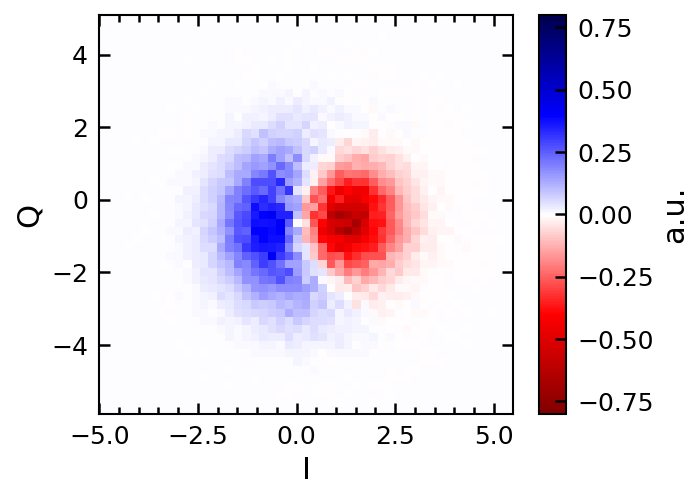

<IPython.core.display.Javascript object>


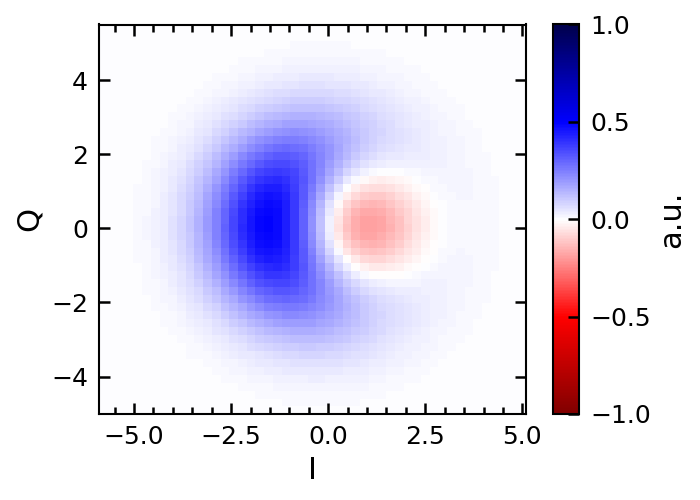

<IPython.core.display.Javascript object>


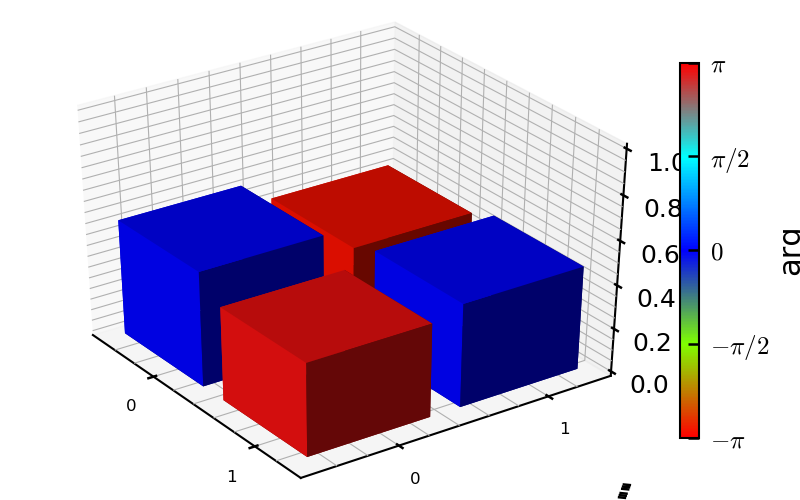

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[ 0.52639519+0.j         -0.42622283-0.04530169j]
 [-0.42622283+0.04530169j  0.47360481+0.j        ]]

In [181]:
f_real = open("C:/Users/szilard\Desktop\measurement data\Q3_278.22mV_field_singleshot_0.5pi_5times_real.txt")
f_imag = open("C:/Users/szilard\Desktop\measurement data\Q3_278.22mV_field_singleshot_0.5pi_5times_imag.txt")
data_real = f_real.readlines()
data_imag = f_imag.readlines()
data_real_all = np.array( [np.array([float(val) for val in data_real[i].split('\t')]) for i in range(4,9)]).flatten()
data_imag_all = np.array( [np.array([float(val) for val in data_imag[i].split('\t')]) for i in range(4,9)]).flatten()
shots_all_p1 = data_real_all + 1j*data_imag_all
f_real.close(); f_imag.close()

f_real = open("C:/Users/szilard\Desktop\measurement data\Q3_278.22mV_field_singleshot_0.5pi_5times_real_dark.txt")
f_imag = open("C:/Users/szilard\Desktop\measurement data\Q3_278.22mV_field_singleshot_0.5pi_5times_imag_dark.txt")
data_real = f_real.readlines()
data_imag = f_imag.readlines()
data_real_all = np.array( [np.array([float(val) for val in data_real[i].split('\t')]) for i in range(4,9)]).flatten()
data_imag_all = np.array( [np.array([float(val) for val in data_imag[i].split('\t')]) for i in range(4,9)]).flatten()
shots_all_dark = data_real_all + 1j*data_imag_all
f_real.close(); f_imag.close()

hist_2D_p1 = np.histogram2d(np.real(shots_all_p1), np.imag(shots_all_p1), bins = 50, density = True)
hist_2D_dark = np.histogram2d(np.real(shots_all_dark), np.imag(shots_all_dark), 
                                 range = [[hist_2D_p1[1][0], hist_2D_p1[1][-1]], [hist_2D_p1[2][0], hist_2D_p1[2][-1]]],
                                 bins = 50, density = True)
dI_dQ = (hist_2D_p1[1][0] - hist_2D_p1[1][-1])*(hist_2D_p1[2][0] - hist_2D_p1[2][-1])/2500

fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(1,1,1)
yy, xx = np.meshgrid(hist_2D_p1[1][:-1], hist_2D_p1[2][:-1])
pcolor = ax.pcolormesh(xx, yy, (hist_2D_p1[0] - hist_2D_dark[0])/dI_dQ, cmap='seismic_r')
fig.colorbar(pcolor, ax=ax, aspect = 15, label = "a.u.")
ax.set_xlabel('I'); ax.set_ylabel('Q') 
pcolor.set_clim(-0.8,0.8)

#psi = Qobj(np.array([[0, 0], [0,1]]))
psi = (qutip.basis(2,0) - qutip.basis(2,1)).unit()
wigner_sim = qutip.wigner(psi, hist_2D_p1[1][:-1], hist_2D_p1[2][:-1], g = 1/np.sqrt(2))
fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(1,1,1)
pcolor = ax.pcolormesh(yy, xx, wigner_sim/.15, cmap='seismic_r')
fig.colorbar(pcolor, ax=ax, aspect = 15, label = "a.u.")
ax.set_xlabel('I'); ax.set_ylabel('Q') 
pcolor.set_clim(-1,1)

a = np.mean(shots_all_p1); hdag_h = np.mean(np.abs(shots_all_dark)**2); 
hdag_2_h_2 = np.mean(np.abs(shots_all_dark)**4) 
adag_a = np.mean(np.abs(shots_all_p1)**2) - hdag_h
a_2 = np.mean(shots_all_p1**2); 
adag_2_a = np.mean(np.conj(shots_all_p1)*np.abs(shots_all_p1)**2) - 2 * np.conj(a) * hdag_h
adag_2_a_2 = np.mean(np.abs(shots_all_p1)**4) - 4*adag_a*hdag_h - hdag_2_h_2

rho = qutip.Qobj(np.array([[1 - adag_a, a], [np.conj(a), adag_a]]))
rho = (rho - (1- loss_scaling) * np.array([[1,0],[0,0]]))/loss_scaling


fig = plt.figure( figsize=(8,5) )
ax = Axes3D(fig, azim=-35, elev=35)
qutip.matrix_histogram_complex(rho, fig=fig, ax=ax) 
rho

<IPython.core.display.Javascript object>


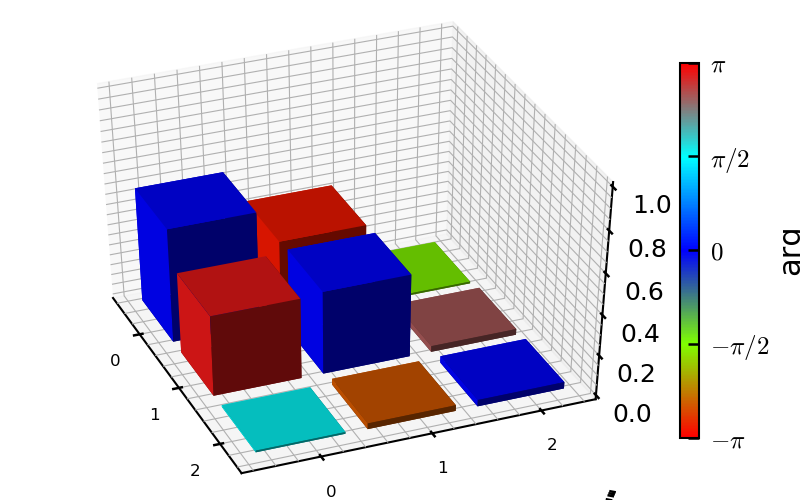

Quantum object: dims = [[3], [3]], shape = (3, 3), type = oper, isherm = True
Qobj data =
[[ 5.58862290e-01+0.j         -3.91052283e-01-0.06664283j
  -4.04523711e-04-0.0088202j ]
 [-3.91052283e-01+0.06664283j  4.08670609e-01+0.j
  -2.48693293e-02+0.01509047j]
 [-4.04523711e-04+0.0088202j  -2.48693293e-02-0.01509047j
   3.24671009e-02+0.j        ]]

In [182]:
rho_from_moments = np.zeros((3,3), dtype = complex)

rho_from_moments[0,0] = 1 - adag_a +  adag_2_a_2/2
rho_from_moments[0,1] = a - np.conj(adag_2_a)
rho_from_moments[0,2] = a_2/sqrt(2)

rho_from_moments[1,0] = np.conj(rho_from_moments[0,1])
rho_from_moments[1,1] = adag_a - adag_2_a_2
rho_from_moments[1,2] = np.conj(adag_2_a)/sqrt(2)


rho_from_moments[2,0] = np.conj(rho_from_moments[0,2])
rho_from_moments[2,1] = np.conj(rho_from_moments[1,2])
rho_from_moments[2,2] = adag_2_a_2/2

rho_from_moments = (rho_from_moments - (1- loss_scaling) * np.array([[1,0,0],[0,0,0],[0,0,0]]))/loss_scaling
fig = plt.figure( figsize=(8,5) )
ax = Axes3D(fig, azim=-35, elev=35)
qutip.matrix_histogram_complex(qutip.Qobj(rho_from_moments), fig=fig, ax=ax) 
qutip.Qobj(rho_from_moments)

In [ ]:
f_real = open("C:/Users/szilard\Desktop\measurement data\Q3_278.22mV_field_single_shot_mixed_state_2us_delay_real.txt")
f_imag = open("C:/Users/szilard\Desktop\measurement data\Q3_278.22mV_field_single_shot_mixed_state_2us_delay_imag.txt")
data_real = f_real.readlines()
data_imag = f_imag.readlines()
data_real_all = np.array( [np.array([float(val) for val in data_real[i].split('\t')]) for i in range(4,9)]).flatten()
data_imag_all = np.array( [np.array([float(val) for val in data_imag[i].split('\t')]) for i in range(4,9)]).flatten()
shots_all_p1 = data_real_all + 1j*data_imag_all
f_real.close(); f_imag.close()

f_real = open("C:/Users/szilard\Desktop\measurement data\Q3_278.22mV_field_single_shot_mixed_state_2us_delay_real_dark.txt")
f_imag = open("C:/Users/szilard\Desktop\measurement data\Q3_278.22mV_field_single_shot_mixed_state_2us_delay_imag_dark.txt")
data_real = f_real.readlines()
data_imag = f_imag.readlines()
data_real_all = np.array( [np.array([float(val) for val in data_real[i].split('\t')]) for i in range(4,9)]).flatten()
data_imag_all = np.array( [np.array([float(val) for val in data_imag[i].split('\t')]) for i in range(4,9)]).flatten()
shots_all_dark = data_real_all + 1j*data_imag_all
f_real.close(); f_imag.close()

hist_2D_p1 = np.histogram2d(np.real(shots_all_p1), np.imag(shots_all_p1), bins = 50, density = True)
hist_2D_dark = np.histogram2d(np.real(shots_all_dark), np.imag(shots_all_dark), 
                                 range = [[hist_2D_p1[1][0], hist_2D_p1[1][-1]], [hist_2D_p1[2][0], hist_2D_p1[2][-1]]],
                                 bins = 50, density = True)
dI_dQ = (hist_2D_p1[1][0] - hist_2D_p1[1][-1])*(hist_2D_p1[2][0] - hist_2D_p1[2][-1])/2500

fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(1,1,1)
yy, xx = np.meshgrid(hist_2D_p1[1][:-1], hist_2D_p1[2][:-1])
pcolor = ax.pcolormesh(xx, yy, (hist_2D_p1[0] - hist_2D_dark[0])/dI_dQ, cmap='seismic_r')
fig.colorbar(pcolor, ax=ax, aspect = 15, label = "a.u.")
ax.set_xlabel('I'); ax.set_ylabel('Q') 
pcolor.set_clim(-0.8,0.8)

a = np.mean(shots_all_p1); adag_a = np.mean(np.abs(shots_all_p1)**2) - np.mean(np.abs(shots_all_dark)**2)
a = a/(loss_scaling ); adag_a = adag_a/(loss_scaling )
rho = qutip.Qobj(np.array([[1 - adag_a, a], [np.conj(a), adag_a]]))

#psi = Qobj(np.array([[0, 0], [0,1]]))
#psi = qutip.Qobj(np.array([[1,0], [0,1]]))
wigner_sim = qutip.wigner(rho, hist_2D_p1[1][:-1], hist_2D_p1[2][:-1], g = 1/np.sqrt(2))
fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(1,1,1)
pcolor = ax.pcolormesh(yy, xx, wigner_sim/.15, cmap='seismic_r')
fig.colorbar(pcolor, ax=ax, aspect = 15, label = "a.u.")
ax.set_xlabel('I'); ax.set_ylabel('Q') 
pcolor.set_clim(-1,1)


fig = plt.figure( figsize=(8,5) )
ax = Axes3D(fig, azim=-35, elev=35)
qutip.matrix_histogram_complex(rho, fig=fig, ax=ax) 


rho

In [109]:
#I think for the mixed state, where I expect zero probability in the middle of I,Q; it will be very sensitive to 

-0.3543749004947607

In [123]:
1/(6.4/6.1)

0.953125

In [183]:
loss_scaling

0.6665061576492075

In [ ]:
#psi = Qobj(np.array([[0, 0], [0,1]]))
psi1 = (qutip.basis(2,0) + qutip.basis(2,1)).unit()
wigner_sim1 = qutip.wigner(psi1, hist_2D_p1[1][:-1], hist_2D_p1[2][:-1], g = 1/np.sqrt(2))
psi2 = (qutip.basis(2,0) - qutip.basis(2,1)).unit()
wigner_sim2 = qutip.wigner(psi2, hist_2D_p1[1][:-1], hist_2D_p1[2][:-1], g = 1/np.sqrt(2))
fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(1,1,1)
pcolor = ax.pcolormesh(yy, xx, wigner_sim1 - wigner_sim2 , cmap='seismic_r')
fig.colorbar(pcolor, ax=ax, aspect = 15, label = "a.u.")
ax.set_xlabel('I'); ax.set_ylabel('Q') 
#pcolor.set_clim(-1,1)

In [ ]:
#psi = Qobj(np.array([[0, 0], [0,1]]))
psi1 = (qutip.basis(2,0) + 1j*qutip.basis(2,1)).unit()
wigner_sim1 = qutip.wigner(psi1, hist_2D_p1[1][:-1], hist_2D_p1[2][:-1], g = 1/np.sqrt(2))
psi2 = (qutip.basis(2,0) - 1j*qutip.basis(2,1)).unit()
wigner_sim2 = qutip.wigner(psi2, hist_2D_p1[1][:-1], hist_2D_p1[2][:-1], g = 1/np.sqrt(2))
fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(1,1,1)
pcolor = ax.pcolormesh(yy, xx, wigner_sim1 - wigner_sim2 , cmap='seismic_r')
fig.colorbar(pcolor, ax=ax, aspect = 15, label = "a.u.")
ax.set_xlabel('I'); ax.set_ylabel('Q') 
#pcolor.set_clim(-1,1)

### Trying to work with probabilities

In [290]:
#yy, xx = np.meshgrid(hist_2D_pi[1][1:], hist_2D_pi[2][1:])
yy, xx = np.meshgrid(I_bins, Q_bins)

dI_dQ = (hist_2D_pi[1][0] - hist_2D_pi[1][-1])*(hist_2D_pi[2][0] - hist_2D_pi[2][-1])/2500
D_S = hist_2D_pi[0]
D_S_dark = hist_2D_pi_dark[0]
zero_moment = np.sum(D_S * dI_dQ) 
S_avg = np.sum(D_S * (xx + 1j*yy)*dI_dQ) 
Sdag_S_avg = np.sum(D_S * (xx**2 + yy**2)*dI_dQ) - np.sum(D_S_dark * (xx**2 + yy**2)*dI_dQ)
print(zero_moment, np.abs(S_avg), Sdag_S_avg)

1.0 507.484941262662 1686838.2444768585


In [154]:
loss_scaling

0.6665061576492075